In [1]:
# Import necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib


In [2]:
# Load the dataset
# The dataset contains 5,171 entries with the following four columns:
#1.	Unnamed: 0: An index column,representing the original row order in the source dataset.
# This column is not relevant for our analysis.
# 2. label: this indicates whether the email is "spam" or "ham" (non-spam).
# 3.text : The content of the email, represented as plain text. This is the key feature used to classify emails.
# 4. 4.	label_num: A numeric encoding of the label column: 0 represents "ham" and 1 represents "spam".

	
df = pd.read_csv("spam_ham_dataset.csv")

In [3]:

# Step 2: Check for NaN values in the dataset
print("Checking for missing values in the dataset:")

# Check for missing values
print(df.isnull().sum()) 


Checking for missing values in the dataset:
Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64


In [4]:
#  Drop rows with missing values in the 'text' and 'label' columns
df = df.dropna(subset=['text', 'label'])


In [5]:
# Step 2: Explore the data

print(df.head())

# View class distribution (spam/ham)
print(df['label'].value_counts())

   Unnamed: 0 label                                               text  \
0         605   ham  Subject: enron methanol ; meter # : 988291\r\n...   
1        2349   ham  Subject: hpl nom for january 9 , 2001\r\n( see...   
2        3624   ham  Subject: neon retreat\r\nho ho ho , we ' re ar...   
3        4685  spam  Subject: photoshop , windows , office . cheap ...   
4        2030   ham  Subject: re : indian springs\r\nthis deal is t...   

   label_num  
0          0  
1          0  
2          0  
3          1  
4          0  
label
ham     3672
spam    1499
Name: count, dtype: int64


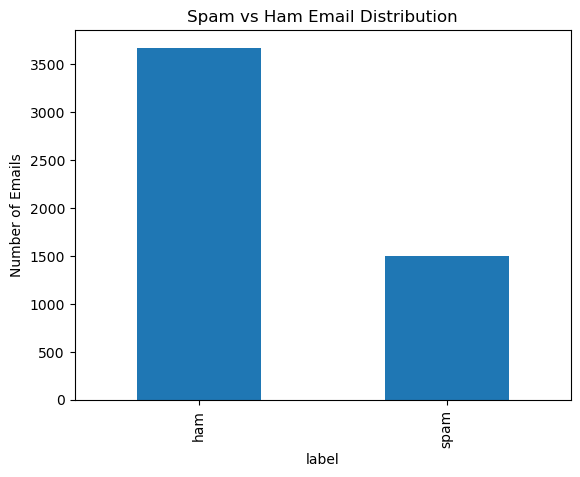

In [6]:
#Visualize the data

# This code creates a bar chart showing how many spam and ham emails are in the dataset.

df['label'].value_counts().plot(kind='bar', title='Spam vs Ham Email Distribution')
plt.ylabel('Number of Emails')
plt.show()

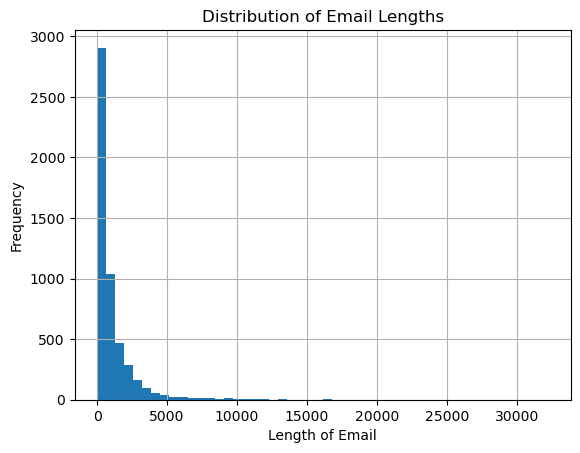

In [7]:
#Visualize frequently occurring words (Word Cloud, Histogram,)
# Here is a simple histogram of email length distribution
df['length'] = df['text'].apply(len)
df['length'].hist(bins=50)
plt.title('Distribution of Email Lengths')
plt.xlabel('Length of Email')
plt.ylabel('Frequency')
plt.show()

In [8]:
#Preprocess the data (text cleaning, TF-IDF Vectorization)
# Clean the text and remove stop words
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(df['text'])

In [9]:
#Prepare the data for training
# Encode the labels: 'ham' as 0 and 'spam' as 1
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Spam or Ham labels
y = df['label'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
#Build the Random Forest model

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [11]:
#Make predictions
y_pred = model.predict(X_test)


In [12]:
#Evaluate the model's performance
#Accuracy score
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification Report (precision, recall, f1-score)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9777777777777777
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       742
           1       0.94      0.98      0.96       293

    accuracy                           0.98      1035
   macro avg       0.97      0.98      0.97      1035
weighted avg       0.98      0.98      0.98      1035



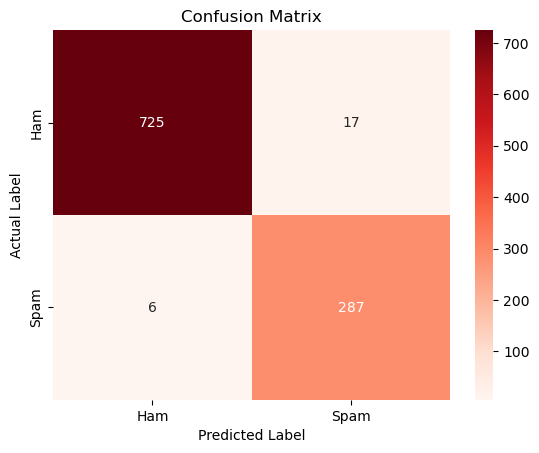

In [13]:
# Confusion Matrix (Visualize errors)•
#Confusion Matrix: A table that shows how many emails were correctly and incorrectly classified as spam or ham.
# The diagonal values represent correct predictions, while the off-diagonal values represent errors.

#These are (725) True Positives (TP) for Ham.
#These are (17) False Positives (FP) for Spam.
#These are (6) False Negatives (FN) for Spam.
#These are True Positives (TP) for Spam.(287)

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [14]:
#Save the trained model for future use
joblib.dump(model, 'spam_classifier_model.pkl')

['spam_classifier_model.pkl']